# Mobile Price Prediction

In this homework, you will analyze and create a predictive model for predicting the price range of mobile phones using a dataset that describes the features of mobile phones. Each row in the dataset represents the specifications of a mobile phone and the target feature is an ordinal variable representing the price range. This dataset that has the following descriptive features. 

- battery_power: Battery power in mAh
- blue: Has bluetooth or not
- clock_speed: Processor clock speed
- dual_sim: Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Depth of the phone in cm
- mobile_wt: Weight of the phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: RAM in Megabytes
- sc_h: Screen height in cm
- sc_w: Screen Width in cm
- talk_time: Longest talk time in hours
- three_g: Has 3G or not
- touch_screen: Has touchscreen or not
- wifi: Has WiFi or not

Your task is to use similarity-based and probability-based learning models to predict the price range of the phone (See `price_range` feature). Below you will find a code snippet to read and describe the dataset. Please make sure your notebook is in the same folder as the dataset file.

In [1]:
#import utility libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

target_feature = 'price_range'
df = pd.read_csv('mppp_data.csv')

#df.info()
#df.head(20)
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Q1. Identify outliers using the IQR method and replace outliers using the clamping technique. (10 pts)
In this part, you will first identify the continuous features (interval and ratio scale), then identify outliers for these features using the interquartile range (IQR) method. The IQR, a measure of statistical dispersion, is the range between third and first quartile ($IQR = Q3-Q1$) and upper and lower bounds for the outliers can be set as:
 - $lower = Q1 - 1.5IQR$
 - $upper = Q3 + 1.5IQR$

You will apply this clamp transformation only to the continious descriptive features and not to the categorical ones. In the end of this question, you will create a new data frame where outliers from continuous features are clamped (`cl_df`).

In [2]:
# manually identify the categorical and continuous features, and put the column names in the lists below 

cont_features = ["battery_power", "clock_speed", "fc","int_memory",
                "m_dep", "mobile_wt", "n_cores", "pc", "px_height", "px_width", "ram",
                "sc_h", "sc_w", 'talk_time']
cat_features = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]

cl_df = df.copy()



##FIND OUTLIERS IN CONT FEATURES 
# your answer goes here
def find_outliers_IQR(cl_df):
    q1=cl_df.quantile(0.25)
    q3=cl_df.quantile(0.75)
    
    IQR=q3-q1
    
    outliers = cl_df[((cl_df<(q1-1.5*IQR)) | (cl_df>(q3+1.5*IQR)))]
    
    return outliers

for each_feature in cont_features:
    outliers = find_outliers_IQR(cl_df[each_feature])
    print('****************************', each_feature, '****************************')

    print("number of outliers: \n" + str(len(outliers)))

    print("max outlier value: \n" + str(outliers.max()))

    print("min outlier value: \n" + str(outliers.min()))



**************************** battery_power ****************************
number of outliers: 
0
max outlier value: 
nan
min outlier value: 
nan
**************************** clock_speed ****************************
number of outliers: 
0
max outlier value: 
nan
min outlier value: 
nan
**************************** fc ****************************
number of outliers: 
18
max outlier value: 
19
min outlier value: 
17
**************************** int_memory ****************************
number of outliers: 
0
max outlier value: 
nan
min outlier value: 
nan
**************************** m_dep ****************************
number of outliers: 
0
max outlier value: 
nan
min outlier value: 
nan
**************************** mobile_wt ****************************
number of outliers: 
0
max outlier value: 
nan
min outlier value: 
nan
**************************** n_cores ****************************
number of outliers: 
0
max outlier value: 
nan
min outlier value: 
nan
**************************** pc **

In [3]:
#CLAMPING THE OUTLIERS
for each_feature in cont_features: 
    one_five_iqr = 1.5 * (cl_df[each_feature].quantile(0.75) - cl_df[each_feature].quantile(0.25))
    q1 = cl_df[each_feature].quantile(0.25)
    q3 = cl_df[each_feature].quantile(0.75)
    min = q1 - one_five_iqr
    max = q3 + one_five_iqr
    
    cl_df.loc[cl_df[each_feature]< min, each_feature] = min
    cl_df.loc[cl_df[each_feature] > max, each_feature] = max
    
    print(each_feature, 'min value: ',df[each_feature].min(), 'max: ',df[each_feature].max())
    


battery_power min value:  501 max:  1998
clock_speed min value:  0.5 max:  3.0
fc min value:  0 max:  19
int_memory min value:  2 max:  64
m_dep min value:  0.1 max:  1.0
mobile_wt min value:  80 max:  200
n_cores min value:  1 max:  8
pc min value:  0 max:  20
px_height min value:  0 max:  1960
px_width min value:  500 max:  1998
ram min value:  256 max:  3998
sc_h min value:  5 max:  19
sc_w min value:  0 max:  18
talk_time min value:  2 max:  20


In [4]:
cl_df.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1,0,7,0.6,188.0,2,...,20,756.0,2549,9.0,7.0,19,0,0,1,1
1,1021.0,1,0.5,1,0,1,53,0.7,136.0,3,...,905,1988.0,2631,17.0,3.0,7,1,1,0,2
2,563.0,1,0.5,1,2,1,41,0.9,145.0,5,...,1263,1716.0,2603,11.0,2.0,9,1,1,0,2
3,615.0,1,2.5,0,0,0,10,0.8,131.0,6,...,1216,1786.0,2769,16.0,8.0,11,1,0,0,2
4,1821.0,1,1.2,0,13,1,44,0.6,141.0,2,...,1208,1212.0,1411,8.0,2.0,15,1,1,0,1
5,1859.0,0,0.5,1,3,0,22,0.7,164.0,1,...,1004,1654.0,1067,17.0,1.0,10,1,0,0,1
6,1821.0,0,1.7,0,4,1,10,0.8,139.0,8,...,381,1018.0,3220,13.0,8.0,18,1,0,1,3
7,1954.0,0,0.5,1,0,0,24,0.8,187.0,4,...,512,1149.0,700,16.0,3.0,5,1,1,1,0
8,1445.0,1,0.5,0,0,0,53,0.7,174.0,7,...,386,836.0,1099,17.0,1.0,20,1,0,0,0
9,509.0,1,0.6,1,2,1,9,0.1,93.0,5,...,1137,1224.0,513,19.0,10.0,12,1,0,0,0


## Q2. Normalize the data using range normalization (10 pts)
In this part, you are expected to use the clamped dataset in the previous question (`cl_df`). Using sklearn's range normalization procedure (i.e., `MinMaxScaler`), initialize a scaler and normalize your features to [0,1] range. Do not include the target feature in your range normalization operation.

In [ ]:
# use cl_df from Question 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for each_feature in cont_features: 
    model = scaler.fit(cl_df[[each_feature]])
    cl_df[[each_feature]] = model.transform(cl_df[[each_feature]])

#cl_df[cont_features].describe()

cl_df.head()



## Q3. Create a Nearest Neighbor classifier for classification (10 pts)
Using sklearn's k-nearest neighbors classifier (`KNeighborsClassifier`), initialize a similarity-based classification model. Set the number of nearest neighbors (`n_neighbors`) parameter to 1. Then, train and test the error rate of your classifier. Use 67% of the data for training and the rest (33%) for testing. Set the random state to the last two digits of your Panther ID (if it has leading 0s, remove them). You are expected to use the clamped and normalized data frame that you generated in Q2.

Print your accuracy score on testing dataset (Note: You can use `accuracy_score` from `sklearn.metrics`).

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, Y_train, Y_test = train_test_split(cl_df[cont_features + cat_features], cl_df['price_range'], 
                                                    train_size=0.67, test_size=0.33, 
                                                    random_state=54)
nn_clf = KNeighborsClassifier(n_neighbors=1)
nn_clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [7]:
y_pred = nn_clf.predict(X_test)
print('1NN accuracy score (after normalization) {:.3f}'.format(accuracy_score(y_pred, Y_test)) )

1NN accuracy score (after normalization) 0.364


## Q4. Searching for the best $k$ (20 points)
Using the same training and testing dataset in Q3, find the training and testing accuracy for different $k$ values ( for each $k$ where $2 \geq k \geq 150$. 

To get the training accuracy, run `predict()` function of the classifier on training data and compare it with the target feature list from training set. To get the testing accuracy, apply the same `predict()` function, this time to testing data and compare it with the labels of the instances in the test set. The difference is that, we used training data to train the model, while the testing data is unseen to the model. 

Collect the training and testing accuracy scores for each $k$ and plot a line chart to show how they deviate as we increase the $k$ value.

Discuss which $k$ value is more suitable, why?

[Text(0.5, 0, 'k'), Text(0, 0.5, 'Accuracy')]

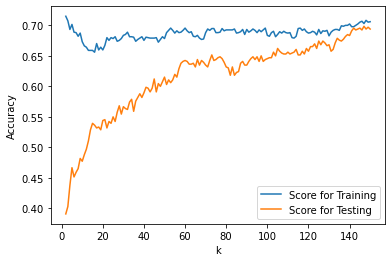

In [8]:
resultsKNN = pd.DataFrame(columns=['KNN', 'Score for Training', 'Score for Testing'])


X_train, X_test, Y_train, Y_test = train_test_split(cl_df[cont_features + cat_features], cl_df['price_range'], 
                                                    train_size=0.67, test_size=0.33, 
                                                    random_state=54)

for knnCount in range (2,151):
    knn = KNeighborsClassifier(n_neighbors=knnCount, p=1, metric='minkowski') #manhattan dist here
    knn.fit(X_train, Y_train)
    y_train_pred = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    
    scoreTrain = accuracy_score(Y_train, y_train_pred)
    scoreTest = accuracy_score(Y_test, y_pred)

    resultsKNN.loc[knnCount] = [knnCount, scoreTrain, scoreTest]

resultsKNN.pop('KNN')
ax = resultsKNN.plot()
ax.set(xlabel='k', ylabel='Accuracy')



In [9]:
resultsKNN[resultsKNN['Score for Training']==resultsKNN['Score for Training'].max()]
resultsKNN[resultsKNN['Score for Testing']==resultsKNN['Score for Testing'].max()]

#The maximum score the training and testing occurs when k = 147. 
#Thus having k=147 would be the best for this model

,Score for Training,Score for Testing
147,0.702985,0.698485


## Q5. Impact of Minkowski orders on kNN Classifiers (20 points)

In this part, you will repeat the same experiment in Q4 (i.e., find how changing $k$ impact the accuracy) in combination with Minkowski order parameter (`p`). In other words, you will use the generalized Minkowski distance instead of the default Euclidean distance (where $p = 2$), which can be calculated as

$Minkowski(q, ins, p) = (\sum( |q_j-ins_j|^p ))^{\frac{1}{p}}$


For each $k \in [2, 150]$ and for each $p \in [1,4]$ find the training and testing accuracy scores. You can do that by alternating `p` and `n_neighbors` parameters in `KNeighborsClassifier`. 

Similar to Q3, collect training and testing accuracy scores and plot 4 line charts for each different value of `p`.

Overall, which Minkowski order value is better? Why?

In [ ]:
ks = []
s = []
st = []
ps = []
resultsKNN = pd.DataFrame(columns=['k', 'p', 'accuracy_test', 'accuracy_train'])
for p in range(1,5):
    x_train, x_test, y_train, y_test = train_test_split(cl_df[cont_features+cat_features], cl_df['price_range'], test_size=0.33, random_state=54)
    for k in range(2,151):
        neighbors = KNeighborsClassifier(n_neighbors=k, p=p)
        neighbors.fit(x_train, y_train)
        ks.append(k)
        s.append(accuracy_score(y_test, neighbors.predict(x_test)))
        st.append(accuracy_score(y_train, neighbors.predict(x_train)))
        ps.append(p)

resultsKNN['k'] = ks
resultsKNN['accuracy_test'] = s
resultsKNN['accuracy_train'] = st
resultsKNN['p'] = ps
resultsKNN


In [ ]:
resultsKNN[resultsKNN['accuracy_test']==resultsKNN['accuracy_test'].max()]
resultsKNN[resultsKNN['accuracy_train']==resultsKNN['accuracy_train'].max()]

#We reach maximum accuracy scores when p=1, so it's better when we set this minkowski value.  

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

for p in range(1,5):
    resultsKNN[resultsKNN['p']==p].plot(x='k', y='accuracy', ax=ax, label='p = '+str(p), ylabel="Accuracy", xlabel="k")

## Q6. Using a Probability-based Classifier (20 points)

In this part, we will utilize probability-based Naive Bayes classifiers to perform mobile phone price range prediction. The same dataset partitions (with the same training/testing sampling ratio and random seed from Q3) will be used to compare the models. 

We will start with discretizing the continuous features (please use the list you prepared in Q1). For each continuous feature in the given dataset, create an ordinal variable using equi-frequency binning that will take the integer values (3 [->high], 2 [->medium], 1 [->low]). Do not transform the categorical variables.

After applying discretization on continuous features, build a Naive Bayes classifier. In this case, use the Categorical Naive Bayes classifier (`CategoricalNB` from `sklearn.naive_bayes` module). Display the accuracy score on testing dataset.

In [ ]:
from sklearn.naive_bayes import CategoricalNB

def bin(column):
    length = len(column)
    l1 = int(length/3)
    l2 = int(length*2/3)
    return column.apply(lambda x: 1 if x < column[l1] else (2 if x < column[l2] else 3))
   
    
NBc_df = cl_df.copy()

for each_feature in NBc_df:
    NBc_df.sort_values(by=each_feature, inplace=True)
    NBc_df[each_feature] = bin(NBc_df[each_feature])

NBc_df


x_train, x_test, y_train, y_test = train_test_split(NBc_df[cont_features+cat_features], NBc_df['price_range'], test_size=0.33,train_size=0.67, random_state=54)
Nbc = CategoricalNB()
Nbc.fit(x_train, y_train)

y_pred = Nbc.predict(x_test)
print("Gaussian NB Accuracy: {0:.2f}".format( accuracy_score(y_test,y_pred) ))


## Q7. Using a Gaussian Naive Bayes Classifier (20 points)
Another alternative to the Categorical Naive Bayes classifier is the Gaussian Naive Bayes classifier. Unlike the Categorical Naive Bayes, Gaussian Naive Bayes classification algorithm utilizes a typical assumption that the continuous values associated with each target feature level are distributed according to a normal distribution.

Using the original dataset (you can read the original dataset from the csv file again) construct a Gaussian Naive Bayes model (`GaussianNB` from `sklearn.naive_bayes` module). Display the accuracy score on testing dataset. Use the same training/testing dataset partitions and compare your result with the Categorical Naive Bayes model from Q6. 

Which model is better? Why?

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#Setup X and y data
X = cl_df[cont_features + cat_features]
y = df['price_range']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,train_size=0.67,random_state=54)

#Fit model
_nbc = GaussianNB(priors = None)
_nbc.fit(X_train,y_train)

y_pred = _nbc.predict(X_test)
print("Gaussian NB Accuracy: {0:.2f}".format( accuracy_score(y_test,y_pred) ))


#The Categorical Naive Baye's model is better because it has a higher accuracy score 
